# Problem Description
- There are 4 explanatory variables (Name, Total Oders, Supplier Confirm Rate, Group) and 1 target variable (Active Status)
- Do Data Exploration to understand the Datas better
- Do Feature Selection (if needed)
- Split Data into Test and Train
- Fit the best model to predict the Active Status of the Users
- Evaluate the prediction result

In [13]:
import pandas as pd
import seaborn as sns
import numpy as np
from sklearn.model_selection import GridSearchCV
from sklearn.ensemble import RandomForestClassifier, GradientBoostingClassifier
from sklearn.tree import DecisionTreeClassifier 
from sklearn.linear_model import LogisticRegression
import matplotlib
import matplotlib.pyplot as plt

# load data 
df = pd.read_csv("dataset.csv", header=0)
df

,name,totalOrders,supplierConfirmRate,group,active
0,Wona Toti,73.0,42%,B,1.0
1,Fija Tiro,78.0,94%,B,1.0
2,Jedi Kihu,0.0,0%,C,0.0
3,Rere Jiko,31.0,87%,B,1.0
4,Nare Joru,56.0,95%,B,1.0
5,Fanu Fewo,60.0,86%,A,0.0
6,Nafu Hato,27.0,95%,A,0.0
7,Taho Wunu,60.0,98%,B,1.0
8,Taja Dora,55.0,96%,B,1.0
9,Jeto Nefo,81.0,96%,A,1.0


## Data Exploration

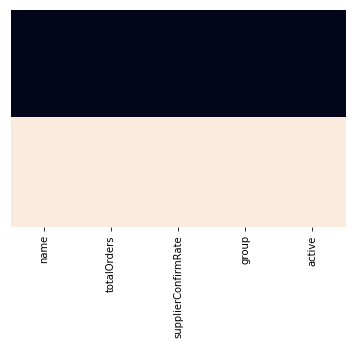

In [14]:
sns.heatmap(df.isnull(),yticklabels=False,cbar=False)

It turns out there are many Nan rows in the dataframe, so I'll just remove them

In [15]:
df = df.dropna()
print(df.shape)

(496, 5)


In [16]:
import matplotlib
import matplotlib.pyplot as plt

def calculate_ratio(column):
    distinct_values = df[column].unique()

    d = pd.DataFrame(columns = distinct_values)
    for index, value in enumerate(distinct_values):
        total = df[column].value_counts()[value]
        l = list()
        for i in range(0,2):
            # I want to see the ratio between active and inactive for each chategory
            part =df[df.active==i][column].value_counts()[value]
            l.append(part/total)
        d[value] = l

    return d

def show_countplot_by_target(column):
    plt.figure()
    ax = sns.countplot(column, hue= 'active' , data = df )
    ax.set_xticklabels(ax.get_xticklabels(), rotation=40, ha="right")
    plt.tight_layout()
        
def show_countplot(column):
    plt.figure()
    ax1 = sns.countplot(column, data = df )
    ax1.set_xticklabels(ax1.get_xticklabels(), rotation=40, ha="right")
    plt.tight_layout()
    plt.show()

Supplier Confirm Rates are supposed to be numerical data but since the format are in string as percentage so I will convert it to become decimal

In [17]:
df['supplierConfirmRate'] = df.supplierConfirmRate.replace({'%':''}, regex=True)
df['supplierConfirmRate'] = pd.to_numeric(df.supplierConfirmRate, errors='ignore') / 100

/anaconda3/lib/python3.7/site-packages/ipykernel_launcher.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  """Entry point for launching an IPython kernel.
/anaconda3/lib/python3.7/site-packages/ipykernel_launcher.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  


### Numerical Features
Now we have 2 numerical columns, and I want to check the correlation between the numerical Datas and the target variable

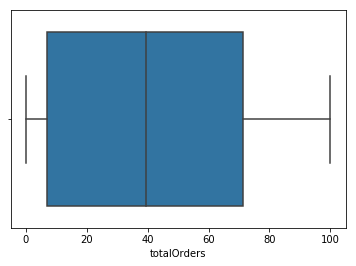

In [18]:
plt.figure()
sns.boxplot( x = 'totalOrders', data = df)

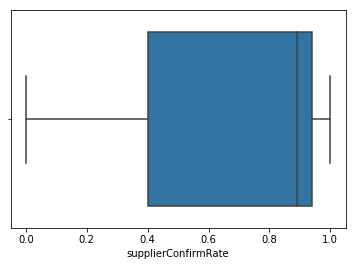

In [19]:
plt.figure()
sns.boxplot( x = 'supplierConfirmRate', data = df)

No Outliers but it seems like there are many 0 datas

Text(0.5,0,'total order')

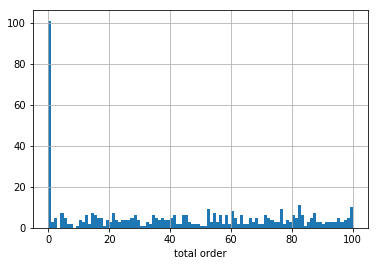

In [20]:
df['totalOrders'].hist(bins=100)
plt.xlabel('total order')

Text(0.5,0,'confirm rate')

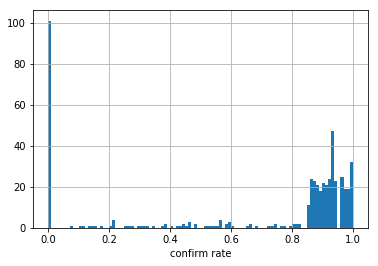

In [21]:
df['supplierConfirmRate'].hist(bins=100)
plt.xlabel('confirm rate')

There are around 100 instances with 0 totalOrder value, and the number of 0 supplier confirm rate is also the same. If based on description of suplierConfirmRate is "percentage of that users orders which have been confirmed by their supplier" so it's make sense to have the same number of 0 value since if there's no order then there's no confirmation rate

In [22]:
#since the number of 0 values are almost 20%, I'll create new categorical feature based on that
df.insert(loc=1, column='hasOrder', value=((df.totalOrders>0) & (df.supplierConfirmRate>0))*1)

,1,0
0,0.258228,0.891089
1,0.741772,0.108911


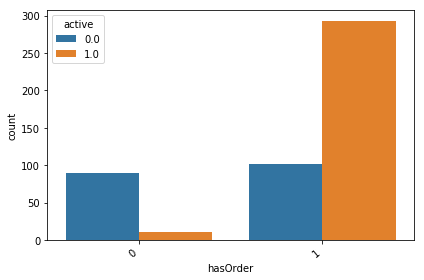

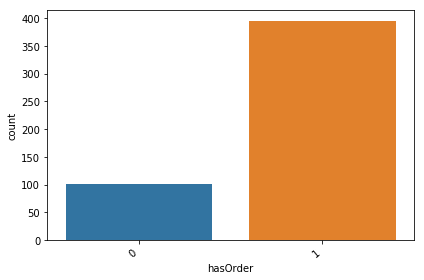

In [23]:
display(calculate_ratio('hasOrder'))
show_countplot_by_target('hasOrder')
show_countplot('hasOrder')

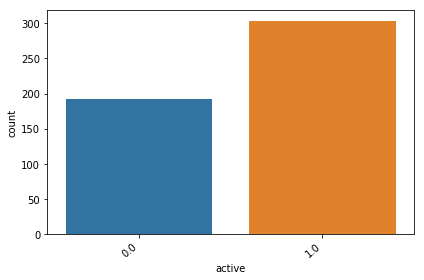

In [24]:
show_countplot('active')

As Expected No Order will be mostlikely an inactive customer, and looked like it give good correlation with the target values, let's see the correlation table below

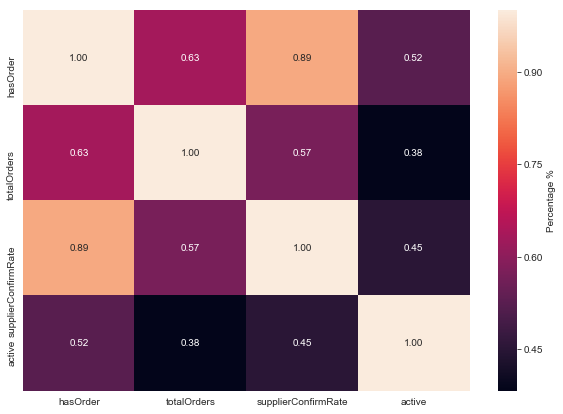

In [1117]:

corr = df.corr()
num,ax = plt.subplots(figsize=(10, 7))
sns.heatmap(corr, 
        xticklabels=corr.columns,
        yticklabels=corr.columns,annot=True, fmt=".2f",cbar_kws={'label': 'Percentage %'}, ax= ax)

the new feature "hasOrder" give a better correlation to target variables rather than the other 2 columns. The correlation between hasOrder with supplierConfirmRate and totalOrders are quite high, so most probably we could remove some of this column, and I will check it with backward elimination later

### Non Numerical Features

We have name and group as the non numerical features. Name for sure will be excluded since it's unique and doesn't have any relation with the target variable. So Let's see whether group have a good correlation with the target variables or not

,B,C,A,D
0,0.363636,0.437037,0.398374,0.34188
1,0.636364,0.562963,0.601626,0.65812


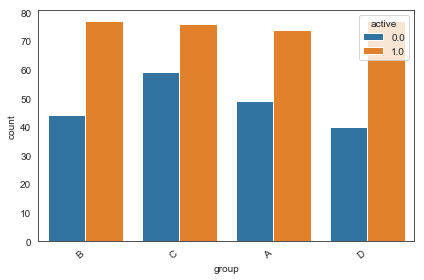

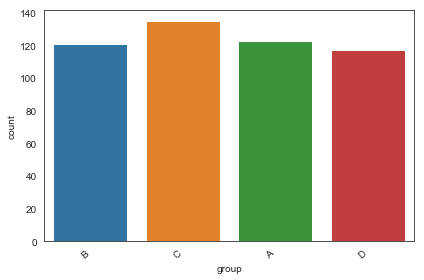

In [1119]:
display(calculate_ratio('group'))
show_countplot_by_target('group')
show_countplot('group')

each category deliver similar ratio of active and inactive around 60:40, most probably it doesn't have high correlation with the target value. But I'll check the pValue to decide whether this needs to be filtered out or not


In [1120]:
X = df.iloc[:,1:-1] #prepare the X variables, without target variable and "name" column
X = pd.get_dummies(X, columns= ['group']) #encode the chategorical column
y = df.active

## Feature Selection
I will use backward elimination to select the feature

In [1121]:
import statsmodels.api as sm

def backwardElimination (x,sl):
    numVars = len(x.iloc[0,:])
    for i in range (0,numVars):
        result = sm.Logit(y,x).fit()
        maxVar = max(result.pvalues)
        if maxVar > sl: #this will remove the max pvalue column until the p value is lower or equal than the slope
            for j in range(0,numVars-i):
                if (result.pvalues[j] == maxVar):
                    print(result.summary2())
                    x = x.drop(x.columns[j], axis='columns' )
                    
    print(result.summary2())
    return x

X = backwardElimination(X,0.05)

Optimization terminated successfully.
         Current function value: 0.517250
         Iterations 6
                          Results: Logit
Model:                Logit            Pseudo R-squared: 0.225     
Dependent Variable:   active           AIC:              527.1122  
Date:                 2019-08-28 11:10 BIC:              556.5583  
No. Observations:     496              Log-Likelihood:   -256.56   
Df Model:             6                LL-Null:          -331.05   
Df Residuals:         489              LLR p-value:      1.2712e-29
Converged:            1.0000           Scale:            1.0000    
No. Iterations:       6.0000                                       
-------------------------------------------------------------------
                     Coef.  Std.Err.    z    P>|z|   [0.025  0.975]
-------------------------------------------------------------------
hasOrder             3.3906   0.6873  4.9332 0.0000  2.0435  4.7377
totalOrders          0.0064   0.0041  1.5

It turned out since there's new hasOrder feature the pvalue for both totalOrder and supplierConfirmRate becomes higher than the slope (0.05) so those are filtered out from the features

In [1122]:
model = LogisticRegression()
result = model.fit(X,y)
beta_coef = pd.Series({ 
                     'hasOrder': result.coef_[0][0],
                     'group_A': result.coef_[0][1],
                     'group_B': result.coef_[0][2],                    
                     'group_C': result.coef_[0][3],
                     'group_D': result.coef_[0][4]
                 })
display(beta_coef)

hasOrder    2.780400
group_A    -0.473027
group_B    -0.199567
group_C    -0.611052
group_D    -0.109287
dtype: float64

 The new feature hasOrder has the highest positive coefficient, which means higher value of this feature (which is 1) will leads to higher value of the target value (also 1). All the group features have negative coefficient which mean the higher the value of the feature, the lower value of target variable, in this case group C has the most probability to be inactive. 

[0.9495545  0.00797306 0.01053355 0.01679603 0.01514287]


Text(0.5,1,'Random Forest Classifier')

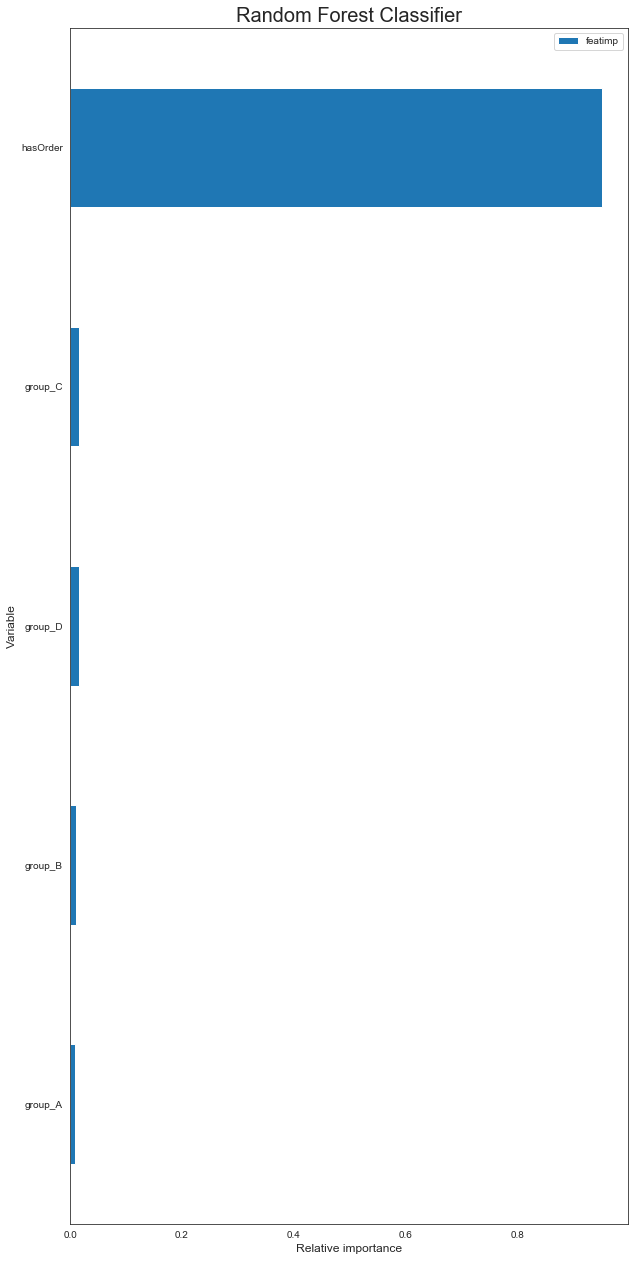

In [1123]:
model = RandomForestClassifier(n_estimators=100)
model.fit(X,y)

print(model.feature_importances_) 

featimp=[]
for i in range(len(X.transpose())):
    featimp.append(model.feature_importances_[i])


rf_sorted=pd.DataFrame(featimp,index=['hasOrder','group_A','group_B','group_C','group_D'], columns=['featimp']).sort_values("featimp").plot.barh(figsize=(10,22))
rf_sorted.set_xlabel("Relative importance", fontsize=12)
rf_sorted.set_ylabel("Variable", fontsize=12)
rf_sorted.set_title("Random Forest Classifier", fontsize=20)

Based on Random Forest feature importance, hasOrder is the most important features and the difference with the other features are relatively high. All the group features doesn't have that high importance.

In [1124]:
from sklearn.model_selection import train_test_split
#split data to train and test
X_train, X_test,y_train, y_test = train_test_split(X, y,test_size=0.2, random_state=42)
print(X_train.shape, y_train.shape)

(396, 5) (396,)


## Model Fitting

I try 4 classifiers, which are Decision tree, Random Forest, Gradient Boosting, and Logistic Regression

### Tunning Hyperparameter

I use gridsearch to find the best parameters for these models

In [1125]:
def find_best_hyperparameter(model,params, X, y, foldnumber=10):
    gridsearch = GridSearchCV(model, params, cv=foldnumber,verbose =1) 
    gridsearch.fit(X, y)
    print(gridsearch.best_params_)

find_best_hyperparameter(DecisionTreeClassifier(),{'random_state':[42], 'criterion':['entropy','gini'],'max_depth':[3,5,10,None], 'min_samples_split':[0.01,0.001,1.0], 'min_samples_leaf' : [0.001,0.01, 0.5]}, X, y,10)
find_best_hyperparameter(RandomForestClassifier(),{'random_state':[42],'n_estimators':[5, 10], 'max_depth':[3,5,10,None], 'min_samples_split':[0.01,1.0,2], 'min_samples_leaf' : [0.001,0.01,0.1]} , X, y,10)
find_best_hyperparameter(GradientBoostingClassifier(),{'random_state':[42],'learning_rate':[0.01,0.1,1,5],'n_estimators':[5, 10], 'max_depth':[3,5,10,None], 'min_samples_split':[0.01,1.0,2], 'min_samples_leaf' : [0.001,0.01,0.1]} , X, y,10)
find_best_hyperparameter(LogisticRegression(),{'penalty':['l1', 'l2'],'C':[0.01,0.5,1,10]},X,y,10)


Fitting 10 folds for each of 72 candidates, totalling 720 fits


[Parallel(n_jobs=1)]: Done 720 out of 720 | elapsed:    2.9s finished


{'criterion': 'entropy', 'max_depth': 3, 'min_samples_leaf': 0.001, 'min_samples_split': 0.01, 'random_state': 42}
Fitting 10 folds for each of 72 candidates, totalling 720 fits


[Parallel(n_jobs=1)]: Done 720 out of 720 | elapsed:   12.2s finished


{'max_depth': 3, 'min_samples_leaf': 0.001, 'min_samples_split': 0.01, 'n_estimators': 5, 'random_state': 42}
Fitting 10 folds for each of 288 candidates, totalling 2880 fits


[Parallel(n_jobs=1)]: Done 2880 out of 2880 | elapsed:   23.0s finished


{'learning_rate': 0.1, 'max_depth': 3, 'min_samples_leaf': 0.001, 'min_samples_split': 0.01, 'n_estimators': 5, 'random_state': 42}
Fitting 10 folds for each of 8 candidates, totalling 80 fits
{'C': 0.5, 'penalty': 'l1'}


[Parallel(n_jobs=1)]: Done  80 out of  80 | elapsed:    0.4s finished


In [1126]:
#put the parameter based on the best hyperparameter result
decision_tree = DecisionTreeClassifier(criterion='entropy',max_depth= 3, min_samples_leaf= 0.001, min_samples_split= 0.01, random_state=42)
random_forest = RandomForestClassifier(max_depth=3, min_samples_leaf=0.001, min_samples_split=0.01, n_estimators=5, random_state=42)
gradboost_clf = GradientBoostingClassifier(learning_rate=0.1, max_depth=3,min_samples_leaf=0.001, min_samples_split=0.01, n_estimators= 5, random_state=42)
log_regression = LogisticRegression(C=0.5,penalty='l1')
model_classifier = {
    "random_forest" : random_forest,
    "decision_tree" : decision_tree,
    "gradient_boosting" : gradboost_clf,
    "log_reg" : log_regression
}

In [1127]:
from sklearn.metrics import roc_curve, auc, confusion_matrix
import matplotlib.pyplot as plt
%matplotlib inline

def show_roc_and_cm(y_test, y_score, model_name):
    fpr, tpr, thr = roc_curve(y_test, y_score)
    roc_auc = auc(fpr, tpr)

    plt.figure()
    plt.plot(fpr, tpr, color='darkorange',
             lw=2, label='ROC curve (area = %0.2f)' % roc_auc)
    plt.plot([0, 1], [0, 1], color='navy', lw=2, linestyle='--')
    plt.xlim([0.0, 1.0])
    plt.ylim([0.0, 1.05])
    plt.xlabel('False Positive Rate')
    plt.ylabel('True Positive Rate')
    plt.title('ROC Curve_' + model_name)
    plt.legend(loc="lower right")
    plt.show()
    
    cm = confusion_matrix(y_test, y_pred)
    fig, ax = plt.subplots()
    im = ax.imshow(cm, interpolation='nearest')
    ax.figure.colorbar(im, ax=ax)
    ax.set(xticks=np.arange(cm.shape[1]),
           yticks=np.arange(cm.shape[0]),
           title="confusion matrix_"+model_name,
           ylabel='Actual',
           xlabel='Predicted')
    plt.setp(ax.get_xticklabels(), rotation=45, ha="right",
             rotation_mode="anchor")
    fmt ='d'
    thresh = 20
    for i in range(cm.shape[0]):
        for j in range(cm.shape[1]):
            ax.text(j, i, format(cm[i, j], fmt),
                    ha="center", va="center",
                    color="white" if cm[i, j] < thresh else "black")
    fig.tight_layout()

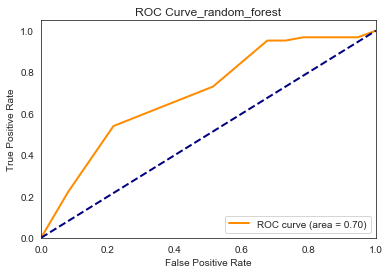

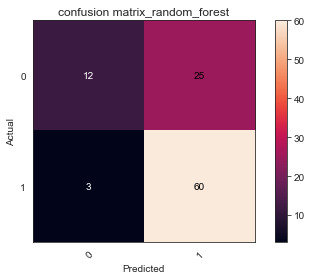

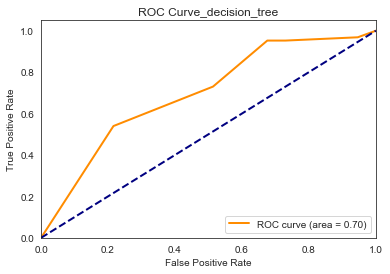

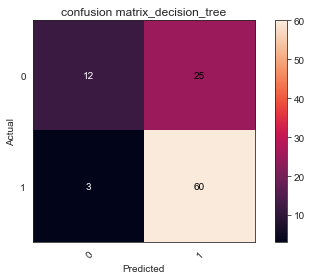

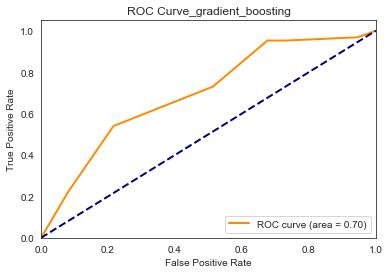

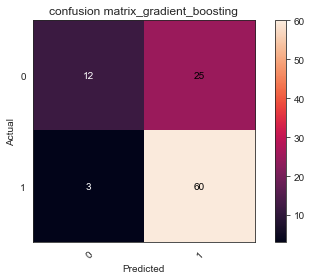

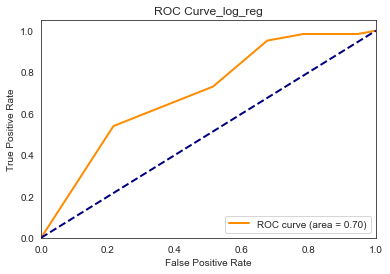

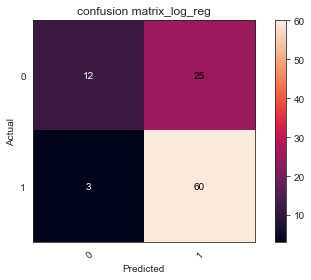

In [1128]:
from sklearn.metrics import roc_auc_score, confusion_matrix, average_precision_score, fbeta_score
from sklearn import metrics
from sklearn.model_selection import cross_val_score

Results = pd.DataFrame(columns = ['Model', 'CV(5)', 'Accuracy', 'Precision_score', 'Recall_score','F1_score'])
for model, model_name in zip(model_classifier.values(), model_classifier.keys()):
  
    model.fit(X_train, y_train)
    y_pred = model.predict(X_test)
    y_score = model.predict_proba(X_test)[:,1]

    X_datas = pd.concat([X_train, X_test])
    y_datas = pd.concat([y_train, y_test])
    Score = cross_val_score(model, X_datas, y_datas, cv=5).mean()



    t = pd.Series({ 
                     'Model': model_name,
                     'CV(5)': Score,
                     'Accuracy': metrics.accuracy_score(y_test, y_pred),
                     'Precision_score': metrics.precision_score(y_test, y_pred),
                     'Recall_score': metrics.recall_score(y_test, y_pred),                    
                     'F1_score': metrics.f1_score(y_test, y_pred)
                 })

    Results = Results.append(t,ignore_index = True)
    show_roc_and_cm(y_test, y_score, model_name)
    
    


In [1129]:
Results

,Model,CV(5),Accuracy,Precision_score,Recall_score,F1_score
0,random_forest,0.771988,0.72,0.705882,0.952381,0.810811
1,decision_tree,0.771988,0.72,0.705882,0.952381,0.810811
2,gradient_boosting,0.771988,0.72,0.705882,0.952381,0.810811
3,log_reg,0.771988,0.72,0.705882,0.952381,0.810811


The results are really interesting, all models give the exact same prediction result. 
- Accuracy : The predictions are 72% correct
- Recall (True Positive/all positive target variable) : from all Active users 95% are predicted correctly 
- Precision (True Positive / all predicted as positive) : the model predict more positive value, so 30% of the positive prediction was incorrectly predicted, and 70% of all the predicted as positive are correct
- F1_score: in average of both recall and precision the score is around 80%
- CV(5): the cross validation result for 5 folds is 77%
- AUC (Area Under the ROC Curve) : The ability of the model to classify correctly is 70%
- Confusion Matrix: 
    - True Positive is 60 predictions
    - False Negative is 3 predictions
    - True Negative is 12 predictions
    - False Positive is 25 predictions
